In [ ]:
# Team Project For MBAN2 Group 3
# Course: Python for Data Analysts: Methods & Tools - DAT-7466 - BMBAN2
# GitHub repositories: https://github.com/HarryYang1008/A2_python

# Group Members:
#   Weikang Yang
#   Ammiel CHIDUWA
#   Alizée Gueneau
#   Maria Medina
#   Yashvi NAGDA
#   Weikang YANG

# Part 1: Prepare The Data

In [25]:
# Import the necessary library 
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the database
db_order7 =pd.read_pickle('orders_7.pickle')
db_orders =pd.read_pickle('orders.pickle')
db_items =pd.read_pickle('items.pickle')
db_res =pd.read_pickle('restaurants.pickle')
db_sum =pd.read_pickle('summarized_orders.pickle')


In [26]:
# Check the Data structure for orders_7.pickle
db_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [27]:
# Check the Data structure for items.pickle
db_order7.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [ ]:
# Check the Data structure for orders.pickle 
db_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [29]:
# Check the Data structure for restaurants.pickle
db_res

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,5/21/2013,2018-05-01
6,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,5/29/2014,2017-08-02
7,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2/2/2015,2017-08-02


In [30]:
# Check the Data structure for summarized_orders.pickle
db_sum.head()

,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


# Part 2: Do the Analysis

## 1. The location for each restraunt


In [ ]:
import folium

# Create a map with the initial center set to the first point
map_center = [db_res['LAT'].mean(), db_res['LONG'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=12)

# mark the location on the map

for _, row in db_res.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        popup=f"{row['NAME']}"  # 显示 RESTAURANT_ID 信息
    ).add_to(map_obj)



map_obj

## 2.The Total order of each Restraunt

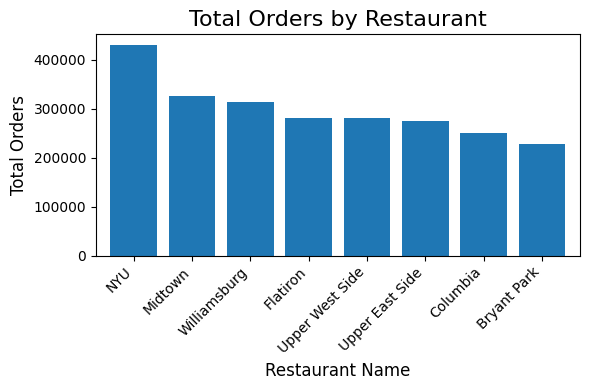

In [32]:
order_totals = db_sum.groupby('RESTAURANT_NAME')['NUM_ORDERS'].sum()

# 绘制直方图
plt.figure(figsize=(6, 4))  # 设置图形大小
order_totals.sort_values(ascending=False).plot(kind='bar', width=0.8)

# 添加标题和标签
plt.title("Total Orders by Restaurant", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签
plt.tight_layout()  # 调整布局避免标签重叠

# 显示图形
plt.show()

## 3. The monthly order Trend of each Restraunt

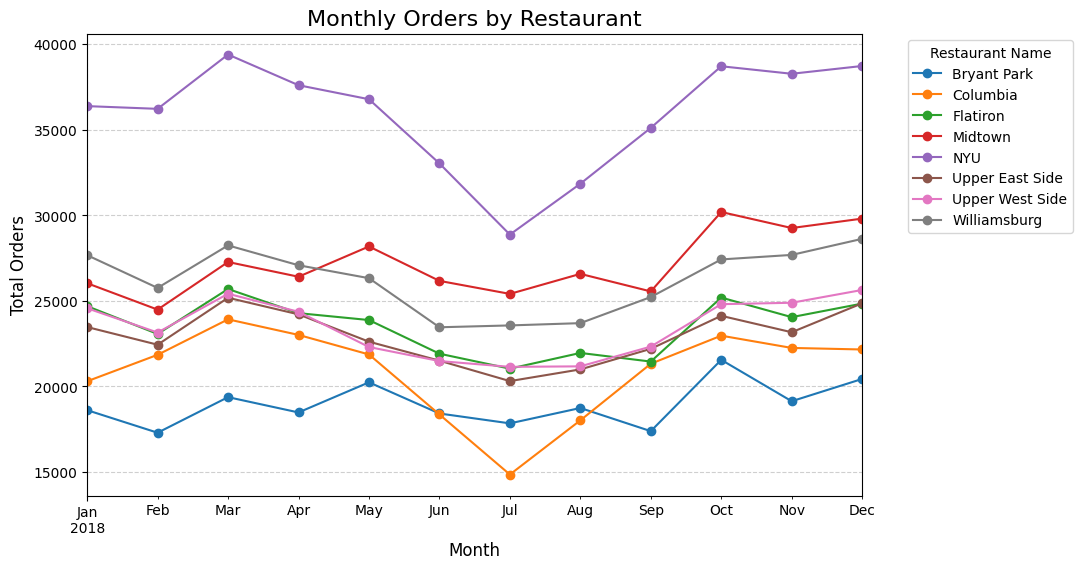

In [33]:
db_sum['DATE'] = pd.to_datetime(db_sum['DATE'])

# 提取月份
db_sum['MONTH'] = db_sum['DATE'].dt.to_period('M')

# 按餐厅和月份分组，统计订单量
monthly_orders = db_sum.groupby(['MONTH', 'RESTAURANT_NAME'])['NUM_ORDERS'].sum().reset_index()

# 透视表，方便可视化
pivot_table = monthly_orders.pivot(index='MONTH', columns='RESTAURANT_NAME', values='NUM_ORDERS').fillna(0)

# 绘制折线图
pivot_table.plot(figsize=(10, 6), marker='o')

# 添加标题和标签
plt.title("Monthly Orders by Restaurant", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.legend(title="Restaurant Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()